<img src="https://drive.google.com/uc?export=view&id=1GxcB09pWggi2b7ZTfeSn4toiMoo5qTxd" alt="2024 IEEE GRSS Data Fusion Contest" />

# 2024 IEEE GRSS Data Fusion Contest 
# Track 1: Flood rapid mapping with SAR data - Starting Kit

## Introduction

Track-1 focuses on mapping the water surface from Copernicus Sentinel-1 SAR imagery. The goal is to accurately determine water and non-water pixels in these event areas by fusing data from one or more of the provided data sources.

A baseline of machine learning algorithms, like random forest, yield F1-scores that range from 0.70 for the most difficult cases to 0.98 for the simplest ones. The goal of the challenge is to maximize the average F1-score over the test set.

## I. Exploratory data analysis

### I. 1. How to open and plot what the raster images and masks look like

The first step for a better comprehension of the data is to open the different files and see whats they look like.

In this part, an extract of 5 patches is explored.

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import rasterio

In [7]:
path_SAR="./Codalab/track_1/images/"
path_masks="./Codalab/track_1/masks/"

In [8]:
# Set the path to the images and labels directory and load the images and masks filenames
img_files = glob.glob(os.path.join(path_SAR, '*.tif'))
msk_files = glob.glob(os.path.join(path_masks, '*.png'))

print("number of images = ", len(img_files))

img_files.sort()
msk_files.sort()
print("img_files =", img_files)
print("msk_files =", msk_files)

number of images =  5
img_files = ['./Codalab/track_1/images/0.tif', './Codalab/track_1/images/103.tif', './Codalab/track_1/images/104.tif', './Codalab/track_1/images/105.tif', './Codalab/track_1/images/106.tif']
msk_files = ['./Codalab/track_1/masks/0.png', './Codalab/track_1/masks/103.png', './Codalab/track_1/masks/104.png', './Codalab/track_1/masks/105.png', './Codalab/track_1/masks/106.png']


**Remark:** as the water masks have pixels value either at 0 or 1 but the possible values are between 0-255, they can appear totally black on a visualization tool without dynamics. But you can still see the masks using a notebook or a specialized softare such as QGIS.

An example below on how to open and plot a water mask image :

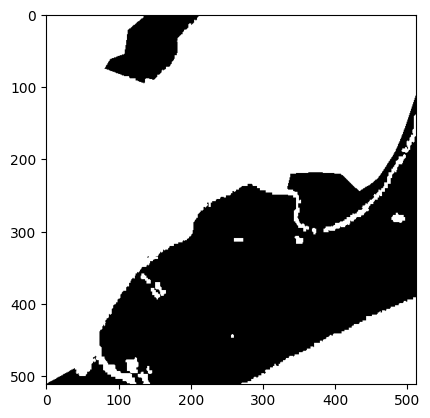

In [9]:
# plot the water mask 105
gray = cv2.imread(msk_files[3], cv2.IMREAD_UNCHANGED)
plt.imshow(gray,  cmap='gray')

And how to plot the associated SAR image, VV (first spectral band).

<class 'numpy.ndarray'>


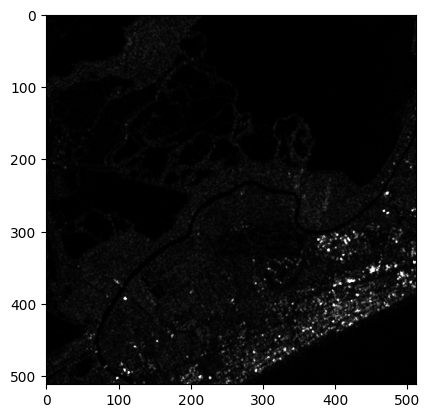

In [10]:
# plot the 105 SAR image VV
img=rasterio.open(img_files[3]).read(1)
print(type(img))
plt.imshow(img, cmap='gray')

And to have a quick look on the different data, an example below of what you can plot:

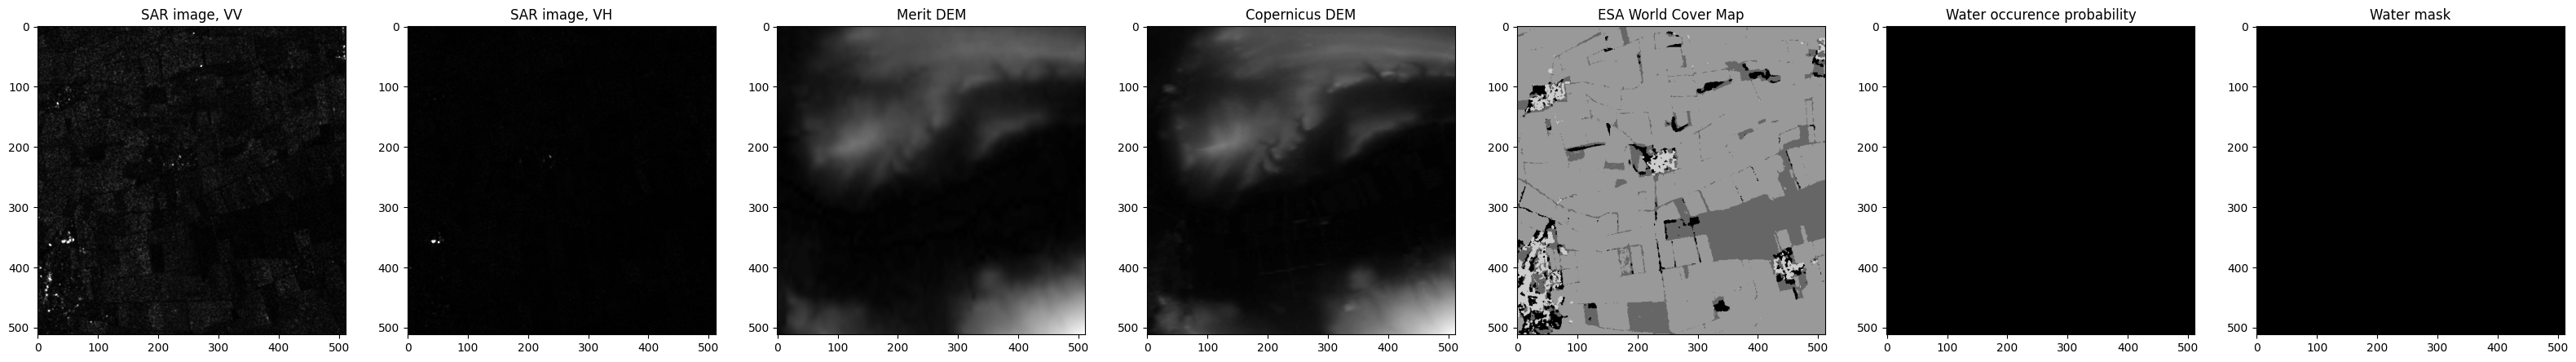

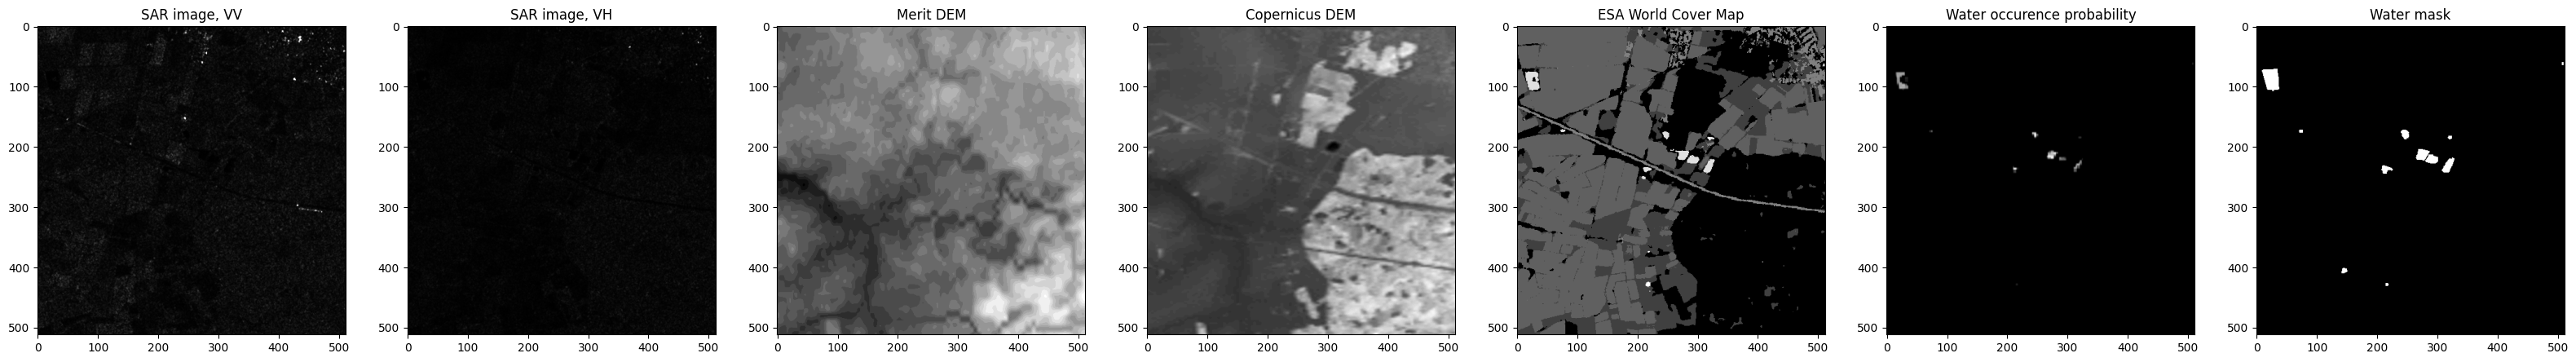

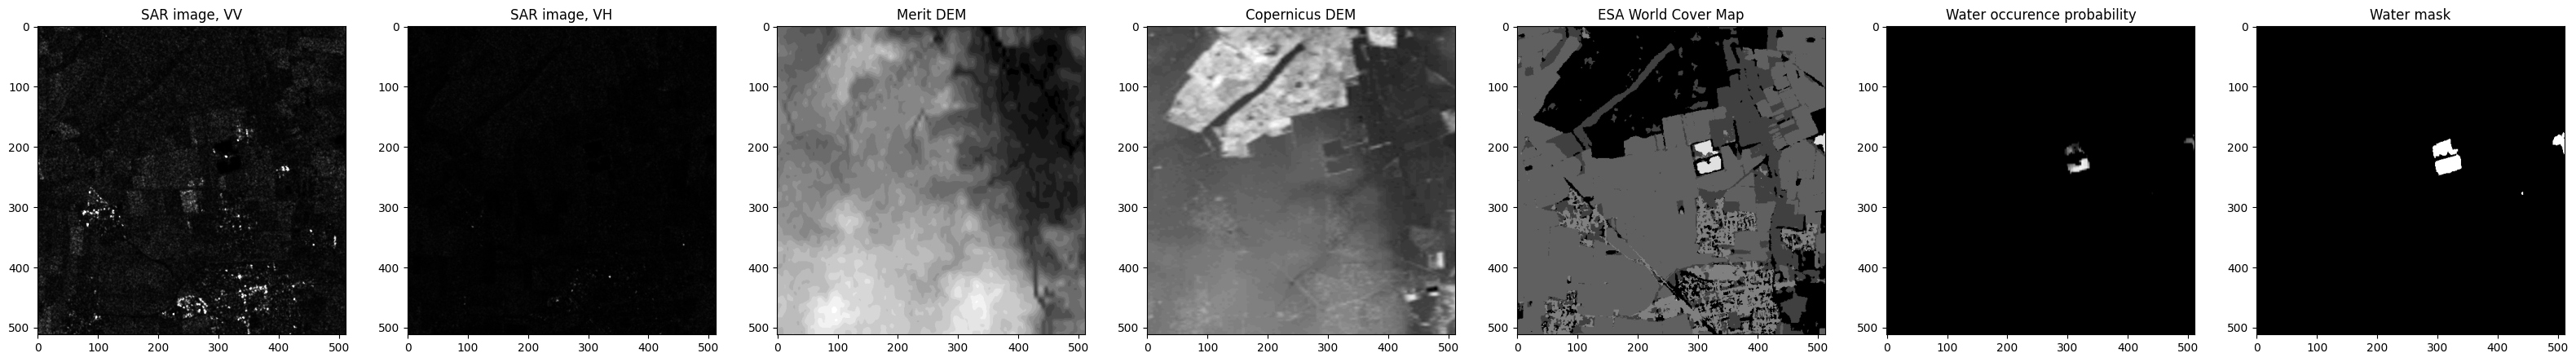

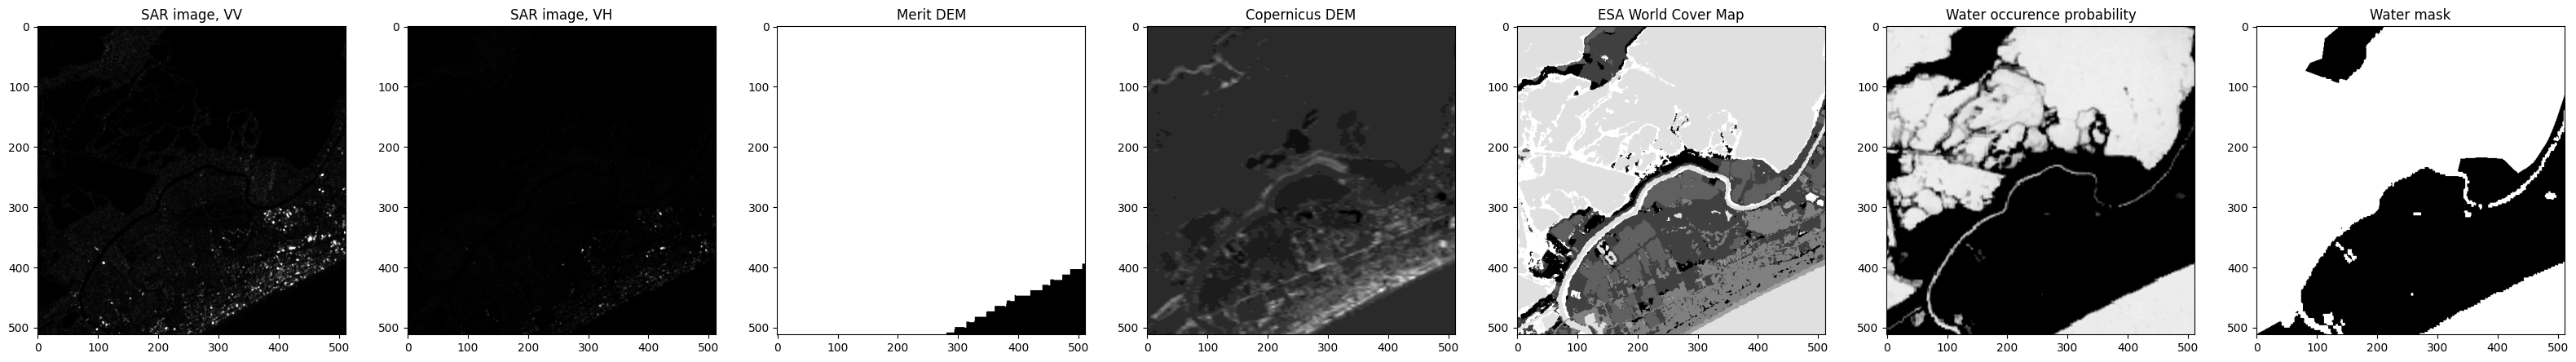

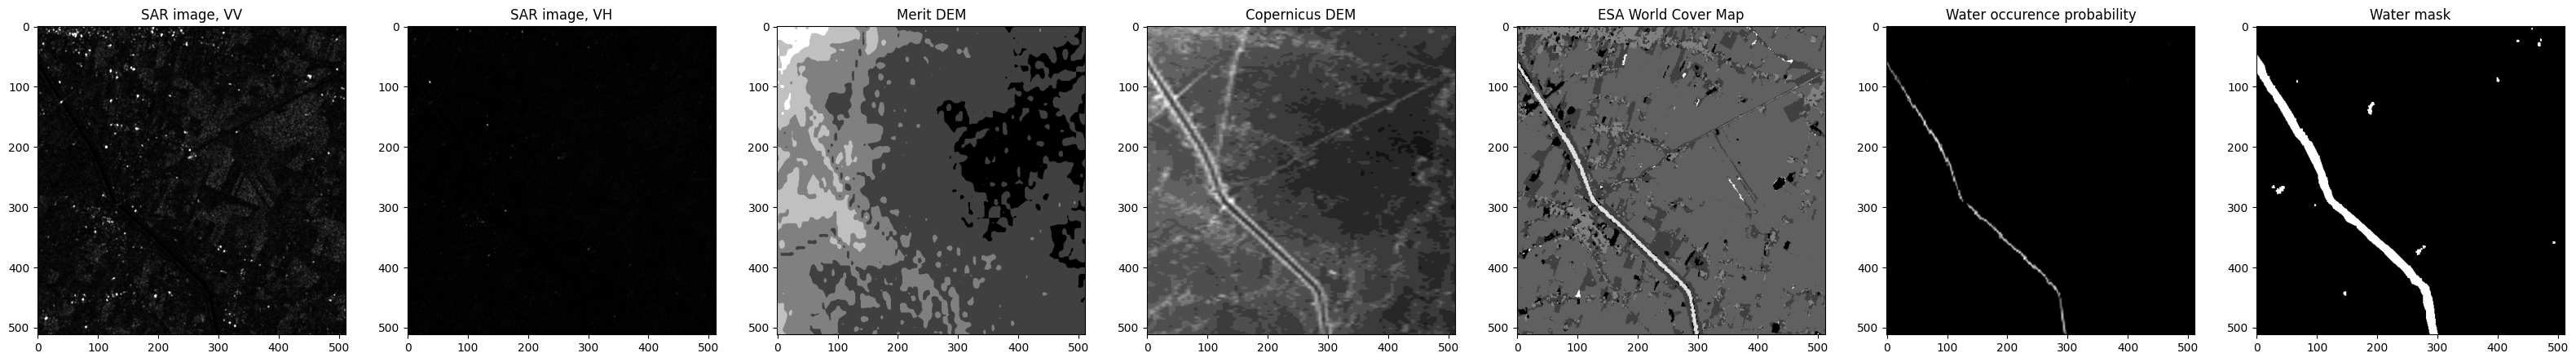

In [11]:
for i in range(len(img_files)):
    path_msk=msk_files[i]
    path_img=img_files[i]
    #print("path_msk = ", path_msk)
    #print("path_img = ", path_img)
    
    # Water mask (.png file)
    mask = cv2.imread(path_msk, cv2.IMREAD_UNCHANGED)
    
    # Spectral bands inside each .tif file
    img1 = rasterio.open(path_img).read(1)
    img2 = rasterio.open(path_img).read(2)
    img3 = rasterio.open(path_img).read(3)
    img4 = rasterio.open(path_img).read(4)
    img5 = rasterio.open(path_img).read(5)
    img6 = rasterio.open(path_img).read(6)

    fig, ax = plt.subplots(1, 7, figsize=(40,20))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2,  cmap='gray')
    ax[2].imshow(img3,  cmap='gray')
    ax[3].imshow(img4,  cmap='gray')
    ax[4].imshow(img5,  cmap='gray')
    ax[5].imshow(img6,  cmap='gray')
    ax[6].imshow(mask,  cmap='gray')
    
    # Set a title for the figures
    ax[0].set_title('SAR image, VV')
    ax[1].set_title('SAR image, VH')
    ax[2].set_title('Merit DEM')
    ax[3].set_title('Copernicus DEM')
    ax[4].set_title('ESA World Cover Map')
    ax[5].set_title('Water occurence probability')
    ax[6].set_title('Water mask')
 

Since the flood mapping task is complex it is appropriate to try deep learning methods.

Participants are encouraged to test various deep learning approaches to see which one is the best. Data augmentation is also a good practice.

## II. Preparing the submission

As described in the challenge, the task consists of a binary water / non-water pixel-wise classification. Participants will submit rapid flood maps to the codalab server. Flood maps shall be a .png product where individual pixels are labeled water (1), or non-water (0). The flood map will have the same grid and resolution as the identified test data file.

Classification accuracy will be evaluated against a test subsample of the reference dataset, which will not be provided to participants. The F1-score metric will be used to rank the results. The algorithm with the highest F1-score on the Phase 2 test set will be the winner.

The expected format of the submission is a zip file containing directly the obtained .png masks (labeled water (1), or non-water (0)); files should not be stored in a directory in the zip archive. Participants must keep the same id at the beginning of the submitted file as the corresponding id of the raster image and the water mask ("id.png"). For example for the image "25.tif" the name of the corresponding mask must start by "25" ; it could be "25.png" or "25_whatever.png", etc.


To create the .zip archive, you can proceed as below:

In [ ]:
# Assuming that the folder containing the files has the following path
path_masks = "/my/path/to/the/images/"

# Go in the directory
cd path_masks

# Build the .zip archive
zip -r ../name_of_your_zip_archive.zip *

# Participants can now upload their archive to Codalab !

If you have trouble to submit your results, make sure your .zip archive have the following architecture:

 ```
name_of_your_zip_archive.zip
|___ id1_msk.png
|___ id2_msk.png
|___ id3_msk.png
|___ id4_msk.png
|___ ... 
 ```

And not the followig:

 ```
name_of_your_zip_archive.zip
|___ name_of_your_zip_archive
     |___ id1_msk.png
     |___ id2_msk.png
     |___ id3_msk.png
     |___ id4_msk.png
     |___ ... 
 ```